In [ ]:
# Text-File Processing--Writing to a Text File: Introducing the with Statement

# Writing to a file
# with open('accounts.txt', mode='w') as accounts:
#   accounts.write('100 Jones 24.98\n')
#   accounts.write('200 Doe 345.67\n')
#   accounts.write('300 White 0.00\n')
#   accounts.write('400 Stone -42.16\n')
#   accounts.write('500 Rich 224.62\n')

# Using shell command to view the file
# !cat accounts.txt
# 100 Jones 24.98
# 200 Doe 345.67
# 300 White 0.00
# 400 Stone -42.16
# 500 Rich 224.62

# Reading from a file
with open('accounts.txt', mode='r') as accounts:
  print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
  for record in accounts:
    account, name, balance = record.split()
    print(f'{account:<10}{name:<10}{balance:>10}')
# Account   Name         Balance
# 100       Jones          24.98
# 200       Doe           345.67
# 300       White           0.00
# 400       Stone         -42.16
# 500       Rich          224.62

# Updating a text file
# accounts = open('accounts.txt', mode='r')
# temp_file = open('temp_file.txt', mode='w')

# with accounts, temp_file:
#   for record in accounts:
#     account, name, balance = record.split()
#     if account == '300':
#       temp_file.write(f'{account} Williams {float(balance) + 100}\n')
#     else:
#       temp_file.write(record)


# import os
# os.remove('accounts.txt')
# os.rename('temp_file.txt', 'accounts.txt')


# Serializing with JSON--Serializing an Object to JSON
import json

# accounts_dict = {
#   'accounts': [
#     {'account': 100, 'name': 'Jones', 'balance': 24.98},
#     {'account': 200, 'name': 'Doe', 'balance': 345.67},
#     {'account': 300, 'name': 'White', 'balance': 0.00},
#     {'account': 400, 'name': 'Stone', 'balance': -42.16},
#     {'account': 500, 'name': 'Rich', 'balance': 224.62}
#   ]
# }

# with open('accounts.json', mode='w') as accounts:
#   json.dump(accounts_dict, accounts)

# !cat accounts.json
# {"accounts": [{"account": 100, "name": "Jones", "balance": 24.98}, {"account": 200, "name": "Doe", "balance": 345.67}, {"account": 300, "name": "White", "balance": 0.0}, {"account": 400, "name": "Stone", "balance": -42.16}, {"account": 500, "name": "Rich", "balance": 224.62}]}

# Deserializing with JSON--Deserializing JSON to an Object
# with open('accounts.json', mode='r') as accounts:
#   accounts_dict = json.load(accounts)

# for account in accounts_dict['accounts']:
#   print(f"{account['account']:<10}{account['name']:<10}{account['balance']:>10}")

# Account   Name         Balance
# 100       Jones          24.98
# 200       Doe           345.67
# 300       White           0.00
# 400       Stone         -42.16
# 500       Rich          224.62

# Serializing with JSON--Displaying JSON in a Pretty Format
with open('accounts.json', mode='r') as accounts:
  accounts_dict = json.load(accounts)

print(json.dumps(accounts_dict, indent=4))
# {
#     "accounts": [
#         {
#             "account": 100,
#             "name": "Jones",
#             "balance": 24.98
#         },
#         ...
#         {
#             "account": 400,
#             "balance": 224.62
#         }
#     ]
# }

# File Open Modes--Reading and Writing Binary Files
# with open('binary', mode='wb') as bin_file:
#   for i in range(17):
#     bin_file.write(bytes([i]))

# with open('binary', mode='rb') as bin_file:
#   for b in bin_file:
#     print(b)




Handling Exceptions

In [20]:
# Try Statement--Handling Exceptions

"""Simple exception handling example."""

while True:
  try:
    number1 = int(input('Enter numerator: '))
    number2 = int(input('Enter denominator: '))
    result = number1 / number2
  except ValueError: # tried to convert non-numeric string to int
    print('Numerator and denominator must be valid numbers!')
  except ZeroDivisionError: # tried to divide by zero
    print('Cannot divide by zero!')
  else: # executed if no exceptions were raised
    print(f'{number1} / {number2} = {result}')
    break # exit loop if successful


Numerator and denominator must be valid numbers!
Numerator and denominator must be valid numbers!
3 / 3 = 1.0


Intro to Data Science: Working with CSV Files--Python Standard Library Module csv

In [22]:
import csv

# with open('accounts.csv', mode='w', newline='') as accounts:
#   writer = csv.writer(accounts)
#   writer.writerow([100, 'Jones', 24.98])
#   writer.writerow([200, 'Doe', 345.67])
#   writer.writerow([300, 'White', 0.00])
#   writer.writerow([400, 'Stone', -42.16])
#   writer.writerow([500, 'Rich', 224.62])

# !cat accounts.csv

# 100,Jones,24.98
# 200,Doe,345.67
# 300,White,0.0
# 400,Stone,-42.16
# 500,Rich,224.62

with open('accounts.csv', mode='r') as accounts:
  reader = csv.reader(accounts)
  for record in reader:
    print(record)

# ['100', 'Jones', '24.98']
# ['200', 'Doe', '345.67']
# ['300', 'White', '0.0']
# ['400', 'Stone', '-42.16']
# ['500', 'Rich', '224.62']

['100', 'Jones', '24.98']
['200', 'Doe', '345.67']
['300', 'White', '0.0']
['400', 'Stone', '-42.16']
['500', 'Rich', '224.62']


Intro to Data Science: Working with CSV Files--Reading CSV Files into Pandas DataFrames

In [2]:
import pandas as pd

accounts_df = pd.read_csv('accounts.csv', names=['Account', 'Name', 'Balance'])
print(accounts_df)
#    Account    Name  Balance
# 0      100   Jones    24.98
# 1      200     Doe   345.67
# 2      300   White     0.00
# 3      400   Stone   -42.16
# 4      500    Rich   224.62

# Assuming you've done all the work to get the data into a DataFrame, you can write it to a CSV file with the to_csv method.
accounts_df.to_csv('accounts_pandas.csv', index=False)


   Account   Name  Balance
0      100  Jones    24.98
1      200    Doe   345.67
2      300  White     0.00
3      400  Stone   -42.16
4      500   Rich   224.62


Intro to Data Science: Working with CSV Files--Reading the Titanic Disaster Dataset

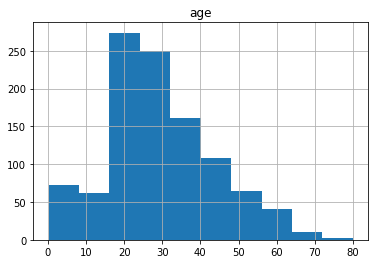

In [14]:
import pandas as pd

titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')

pd.set_option('precision', 2)

# Change the column names of our DataFrame
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']

# Descriptive  statistics will be done on the column with numeric data
titanic.describe()
# 	    age
# count	1046.00
# mean	29.88
# std	14.41
# min	0.17
# 25%	21.00
# 50%	28.00
# 75%	39.00
# max	80.00

(titanic.survived == 'yes').describe()
# count      1309
# unique        2
# top       False
# freq        809
# Name: survived, dtype: object

# Display the data in a historgram
histogram = titanic.hist()
